Homework 3 - Heather Turcios

# Exercise 4.1

### Creating a Polygon

In [2]:
#Import geometeric objects using shapely module
from shapely.geometry import Point, LineString, Polygon

In [3]:
#Create variables for given coordinates
x = [-118.4152, -118.4152, -118.4144, -118.4143, -118.4142, -118.4152]
y = [33.9699, 33.9689, 33.9689, 33.96890, 33.96990, 33.9699]

#Create polygon
poly = Polygon(zip(x,y))

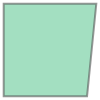

In [4]:
poly

### Finding Polygon Attributes

In [5]:
#Get the centroid of Polygon
poly_centroid = poly.centroid
print("Poly centroid: ", poly_centroid)

Poly centroid:  POINT (-118.4147245614035 33.96940877192983)


In [6]:
#Get the bounds (bounding box) of Polygon
poly_bounds = poly.bounds
print("Poly Bounding Box: ", poly_bounds)

Poly Bounding Box:  (-118.4152, 33.9689, -118.4142, 33.9699)


# Exercise 4.2

In [9]:
#Import package
import geopandas as gpd

In [10]:
#Read the given file
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

In [11]:
#Check the coordinate system from the file
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The default CRS is WGS 84 which uses latitude and longitude and is a GCS system as it is in decimal degrees.

In [13]:
#Finding size of the dataframe
data.shape

(281, 18)

In [14]:
#Listing the column names
data.columns.values

array(['OBJECTID', 'zip', 'jenicategory', 'jenipctl', 'jenirank',
       'riskcategory', 'riskpctl', 'driverscategory', 'driverspctl',
       'systemcategory', 'systempctl', 'neighborhood', 'sup_dist', 'spa',
       'csa', 'SHAPE_Length', 'SHAPE_Area', 'geometry'], dtype=object)

In [16]:
#Show the first 10 rows of the dataframe 
data.head(10)

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
5,6,90077,Lowest,1.8,272,Lowest,2.5,Lowest,13.6,Lowest,1.4,Bel-Air,District 3,SPA 5 - West,Los Angeles - Bel Air,0.268660,0.001831,"MULTIPOLYGON (((-118.45549 34.13449, -118.4555..."
6,7,91436,Lowest,2.2,271,Lowest,10.4,Lowest,5.4,Lowest,2.5,Encino,District 3,SPA 2 - San Fernando,Los Angeles - Encino,0.232985,0.001614,"MULTIPOLYGON (((-118.49296 34.18609, -118.4929..."
7,8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,District 2,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306,"MULTIPOLYGON (((-118.40129 33.98378, -118.4008..."
8,9,91007,Lowest,2.9,269,Lowest,3.2,Lowest,10.0,Lowest,6.9,Arcadia,District 5,SPA 3 - San Gabriel,City of Arcadia,0.212972,0.001380,"MULTIPOLYGON (((-118.05051 34.14841, -118.0500..."
9,10,90049,Lowest,3.3,268,Lowest,13.6,Lowest,2.5,Lowest,4.3,Brentwood,District 3,SPA 5 - West,Los Angeles - Brentwood,0.395030,0.003870,"MULTIPOLYGON (((-118.48933 34.13154, -118.4886..."


In [17]:
#Make a copy of the dataframe
orig = data.copy()

In [18]:
#Reproject the data
data = data.to_crs(epsg=3857)

In [19]:
#Check the new geometry values
print(data['geometry'].head())

0    MULTIPOLYGON (((-13147794.179 4047256.800, -13...
1    MULTIPOLYGON (((-13129326.139 4025429.029, -13...
2    MULTIPOLYGON (((-13179177.697 4002548.915, -13...
3    MULTIPOLYGON (((-13224787.024 4048688.878, -13...
4    MULTIPOLYGON (((-13179462.784 3993751.501, -13...
Name: geometry, dtype: geometry


In [25]:
#Import package
%matplotlib inline
import matplotlib.pyplot as plt

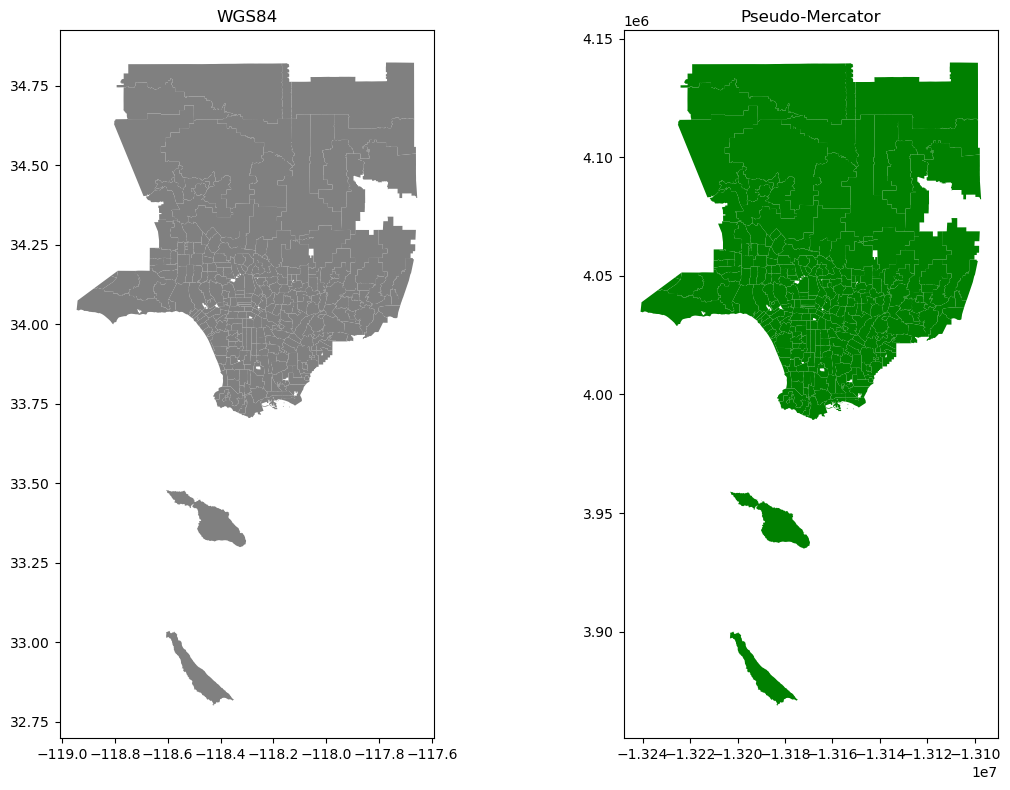

In [27]:
#Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

#Plot the data for WGS84 (original)
orig.plot(ax=ax1, facecolor='gray');

#Add title
ax1.set_title("WGS84");

#Plot the one with EPSG 3857 projection
data.plot(ax=ax2, facecolor='green');

#Add title
ax2.set_title("Pseudo-Mercator");

#Remove empty white space around the plot
plt.tight_layout()

The Pseudo-Mercator looks slightly wider than the WGS84. In the upper left, the horizontal line looks slightly longer on the Pseudo-Mercator. In the bottom left, the shape of the curve looks slightly longer on the WGS84 and a bit more pushed in. Other than that, most of the map looks fairly close.